In [11]:
#importazione delle librerie necessarie 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.datasets import cifar10

In [12]:
# Caricamento del dataset CIFAR-10
(X_train_full, y_train_full), (X_test_full, y_test_full) = cifar10.load_data()
y_train_full = y_train_full.flatten()
y_test_full = y_test_full.flatten()

# Riduzione del dataset al 10% (train e test), stratificato
X_train, _, y_train, _ = train_test_split(
    X_train_full, y_train_full, train_size=0.1, stratify=y_train_full, random_state=42
)
X_test, _, y_test, _ = train_test_split(
    X_test_full, y_test_full, train_size=0.1, stratify=y_test_full, random_state=42
)


In [13]:
# Flatten delle immagini (da 32x32x3 a 3072)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

# Standardizzazione
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
#Definizione dei modelli e dei grid parametri
modelli = {
    'Logistic Regression': (LogisticRegression(max_iter=30000), {
        'C': [0.1, 1, 10],
        'solver': ['saga'],
        'multi_class': ['multinomial']
    }),
    'KNN': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }),
    'SVM': (SVC(), {
        'C': [0.1, 1],
        'kernel': ['linear', 'rbf']
    }),
    'Decision Tree': (DecisionTreeClassifier(), {
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    })
}

best_models = {}
accuracies = {}


>>> Logistic Regression
Test Accuracy: 0.29
Params: {'C': 0.1, 'multi_class': 'multinomial', 'solver': 'saga'}


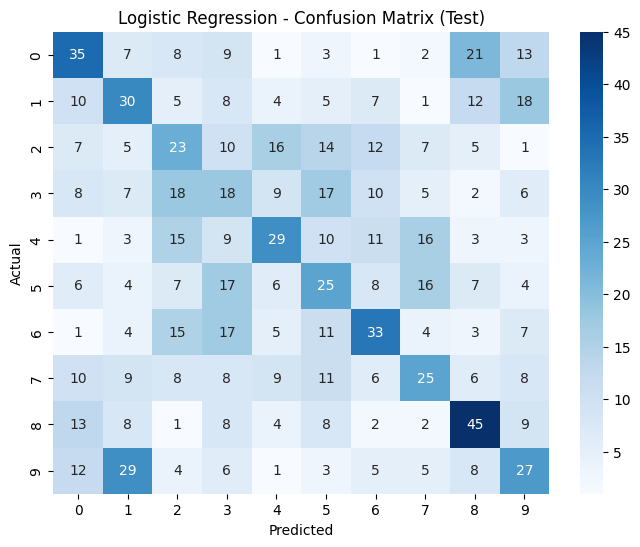


>>> KNN
Test Accuracy: 0.301
Params: {'n_neighbors': 5, 'weights': 'distance'}


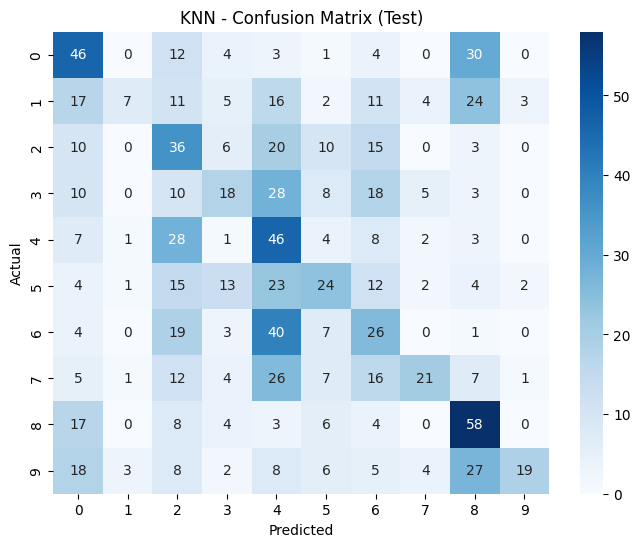


>>> SVM
Test Accuracy: 0.437
Params: {'C': 1, 'kernel': 'rbf'}


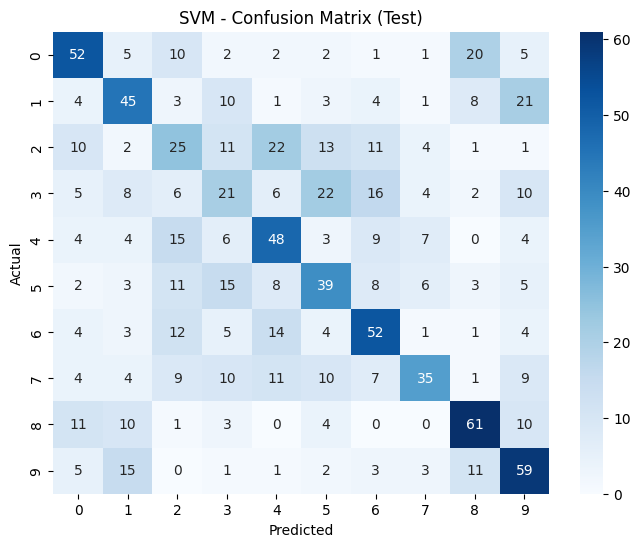


>>> Decision Tree
Test Accuracy: 0.244
Params: {'max_depth': 10, 'min_samples_split': 10}


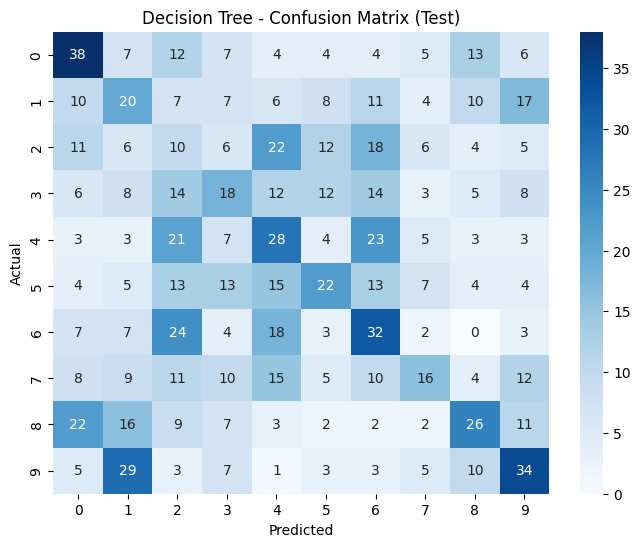

In [15]:
#GridSearchCV per ogni modello e valutazione su test
for name, (model, params) in modelli.items():
    print(f"\n>>> {name}")
    grid = GridSearchCV(model, params, cv=3, n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_

    acc_test = accuracy_score(y_test, grid.predict(X_test))
    accuracies[name] = acc_test

    print("Test Accuracy:", acc_test)
    print("Params:", grid.best_params_)

    y_pred_test= grid.predict(X_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix (Test)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [16]:
#Selezione del miglior modello
best_model_name = max(accuracies, key=accuracies.get)
best_model = best_models[best_model_name]
best_test_acc = accuracies[best_model_name]

print(f"\n>>> Miglior modello selezionato: {best_model_name}")
print(f"Test Accuracy: {best_test_acc:.4f}")


>>> Miglior modello selezionato: SVM
Test Accuracy: 0.4370



>>> Classification Report - SVM (Test Set)
              precision    recall  f1-score   support

           0       0.51      0.52      0.52       100
           1       0.45      0.45      0.45       100
           2       0.27      0.25      0.26       100
           3       0.25      0.21      0.23       100
           4       0.42      0.48      0.45       100
           5       0.38      0.39      0.39       100
           6       0.47      0.52      0.49       100
           7       0.56      0.35      0.43       100
           8       0.56      0.61      0.59       100
           9       0.46      0.59      0.52       100

    accuracy                           0.44      1000
   macro avg       0.44      0.44      0.43      1000
weighted avg       0.44      0.44      0.43      1000



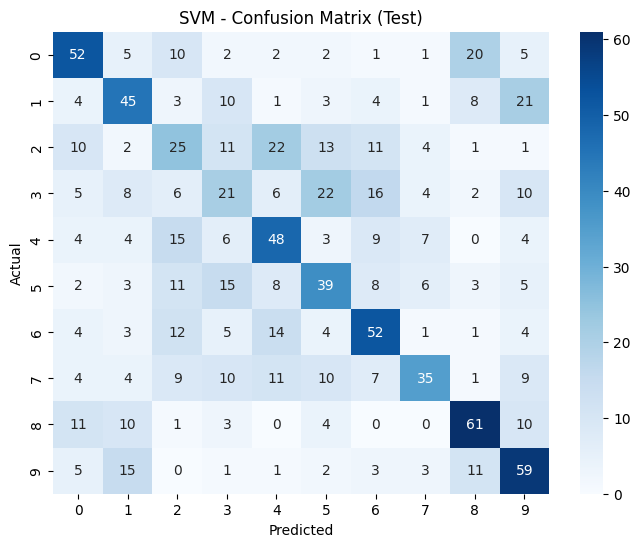

In [17]:
#Report e Confusion Matrix sul test set finale
y_pred_test = best_model.predict(X_test)
print(f"\n>>> Classification Report - {best_model_name} (Test Set)")
print(classification_report(y_test, y_pred_test))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues')
plt.title(f"{best_model_name} - Confusion Matrix (Test)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()